In [23]:
import numpy as np
import matplotlib.pyplot as plt

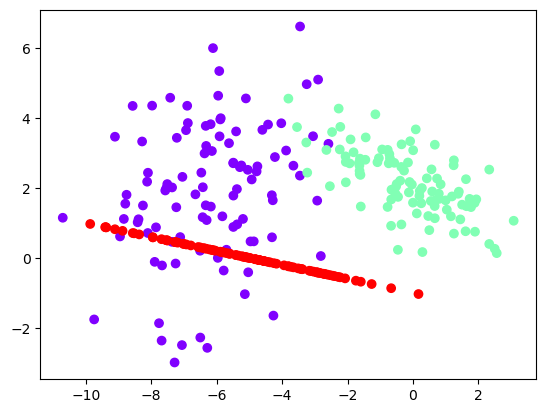

In [37]:
# Data for Cluster 1
group1_center = [-6, 2]
group1_covariance = [[3, 0], [0, 3]]  # High variance in y-axis, low in x-axis
group1_samples = np.random.multivariate_normal(group1_center, group1_covariance, 100)

# Data for Cluster 2
group2_center = [0, 2]
group2_covariance = [[2, -1], [-1, 1]]  # High variance in x-axis, low in y-axis
group2_samples = np.random.multivariate_normal(group2_center, group2_covariance, 100)

# Data for Cluster 3
group3_center = [-5, 0]
group3_covariance = [[5, -1], [-1, 0.2]]  # Moderate variance in both x and y axes
group3_samples = np.random.multivariate_normal(group3_center, group3_covariance, 100)

# Combining samples from all clusters
combined_samples = np.concatenate((group1_samples, group2_samples, group3_samples), axis=0)
group_labels = np.concatenate((np.zeros(100), np.ones(100), (np.ones(100)*2)), axis=0)

plt.scatter(combined_samples[:,0], combined_samples[:,1], c=group_labels, cmap='rainbow')
plt.show()

In [38]:
from sklearn.mixture import GaussianMixture

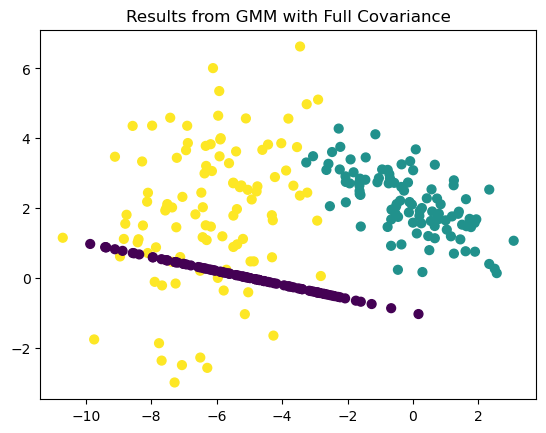

In [39]:
# Train a GMM model
gmm_model = GaussianMixture(3, covariance_type='full').fit(combined_samples)
predicted_labels = gmm_model.predict(combined_samples)

# Visualize the results
plt.title("Results from GMM with Full Covariance")
plt.scatter(combined_samples[:, 0], combined_samples[:, 1], c=predicted_labels, s=40)
plt.show()

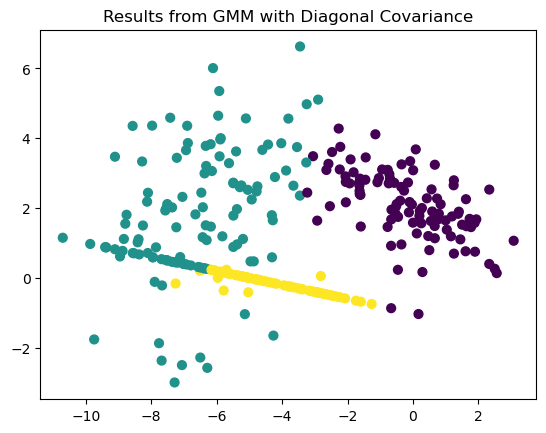

In [40]:
# Train a GMM model with diagonal covariance
gmm_diagonal = GaussianMixture(3, covariance_type='diag').fit(combined_samples)
predicted_diagonal_labels = gmm_diagonal.predict(combined_samples)

# Visualize the results
plt.title("Results from GMM with Diagonal Covariance")
plt.scatter(combined_samples[:, 0], combined_samples[:, 1], c=predicted_diagonal_labels, s=40)
plt.show()

In [41]:
from sklearn.cluster import KMeans

/Users/amaterasu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


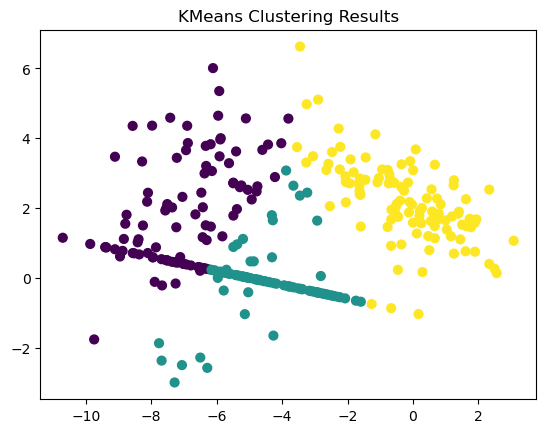

In [42]:
# Initialize and train KMeans model
kmeans_model = KMeans(3, random_state=0)
kmeans_labels = kmeans_model.fit_predict(combined_samples)

# Visualize clustering results
plt.scatter(combined_samples[:, 0], combined_samples[:, 1], c=kmeans_labels, s=40)
plt.title("KMeans Clustering Results")
plt.show()

In [36]:
print("From the observations, it's evident that the GMM with unrestricted covariance succeeds, while the others fall short.")

From the observations, it's evident that the GMM with unrestricted covariance succeeds, while the others fall short.
